In [1]:
#importing libraries
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning)

pd.set_option("display.max_colwidth", 300)

In [2]:
#loading the datasets(train and test
train = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv("test_tweets_anuFYb8.csv")

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


# 1. Data inspection

In [4]:
#racist tweets samples
racist_tweets_samples = train[train['label']==1].head(10)
print(racist_tweets_samples)

      id  label  \
13    14      1   
14    15      1   
17    18      1   
23    24      1   
34    35      1   
56    57      1   
68    69      1   
77    78      1   
82    83      1   
111  112      1   

                                                                                                                                 tweet  
13                                                          @user #cnn calls #michigan middle school 'build the wall' chant '' #tcot    
14                               no comment!  in #australia   #opkillingbay #seashepherd #helpcovedolphins #thecove  #helpcovedolphins  
17                                                                                                              retweet if you agree!   
23                                                                                     @user @user lumpy says i am a . prove it lumpy.  
34                            it's unbelievable that in the 21st century we'd need something like this. a

In [5]:
#non racist tweets samples
non_racist_tweets_samples = train[train['label']==0].head(10)
print(non_racist_tweets_samples)

   id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   
5   6      0   
6   7      0   
7   8      0   
8   9      0   
9  10      0   

                                                                                                                                             tweet  
0                                            @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1                       @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                                              bihday your majesty  
3                                                           #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦    
4                                                                             

In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

Train dataset has 31,962 tweets , test dataset has 17,197 tweets

In [7]:
#label distribution in train dataset
train["label"].value_counts()


0    29720
1     2242
Name: label, dtype: int64

In [8]:
racist_tweets = train['label']==1
non_racist_tweets = train['label']==0
racist_tweets_total=racist_tweets.sum()
non_racist_tweets_total=non_racist_tweets.sum()

total_tweets = train['label'].count()

percentage_racist_tweets = (racist_tweets_total/total_tweets)*100
percentage_non_racist_tweets =  (non_racist_tweets_total/total_tweets)*100

print(f"The train dataset has 29720 ({percentage_non_racist_tweets}%) non racist tweets and 2242 ({percentage_racist_tweets}%) rasist tweets")


The train dataset has 29720 (92.98542018647143%) non racist tweets and 2242 (7.014579813528565%) rasist tweets


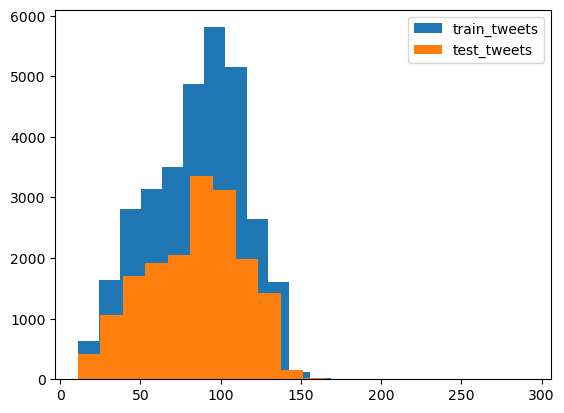

In [9]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")

plt.legend()
plt.show()

# 2. Data Cleaning
The objective of this step is to clean noise, which are less relevant to finding the sentiment of tweets e.g punctuation, special characters, numbers, and terms which don’t carry much weight in context to the text.



### 2.1 Combining the training data the test data to make it convinient to preprocess the data

In [10]:
combined_data = train.append(test, ignore_index=True)
combined_data.shape

/tmp/ipykernel_34738/2131829051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = train.append(test, ignore_index=True)


(49159, 3)

### 2.2 Removing unwanted text patterns from the tweets

In [11]:
#function to remove unwanted text patterns from the tweets

def remove_unwanted_text_pattern (input_text, pattern) :
    r = re.findall(pattern,input_text)
    for i in r:
        input_text = re.sub(i, '', input_text)
    return input_text
        

### 2.3 Removing Twitter handles (@user)
Removing Twitter handles as they are already masked as "@user" due to privacy conserns. The twitter handles hardly give any information about the nature of the Tweet.

In [12]:
combined_data['tidy_tweet'] = np.vectorize(remove_unwanted_text_pattern)(combined_data['tweet'],'@[\w]*')
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


### 2.4 Removing Punctuations, Numbers and Special Characters
Getting rid of  Punctuations, Numbers and Special Characters since they wouldn't help in differentiating the tweets.<br>
Here we'll remove everything except characters and hashtags with spaces.<br>
The regex "[^a-zA-Z#]", means everything except alphabets and #

In [13]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].str.replace("[^a-zA-Z# ]", " ", regex = True)
combined_data.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


### 2.5 Removing Short Words
Removing all words with a length of 3 or less. e.g words like "hmm","oh" which are of very little use.

In [14]:
combined_data['tidy_tweet'] = combined_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined_data.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


### 2.6 Text Normalization

Here we will use nltk’s PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [15]:
tokenized_tweets = combined_data['tidy_tweet'].apply(lambda x : x.split())
tokenized_tweets.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [16]:
from nltk.stem.porter import *

Stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [Stemmer.stem(i) for i in x] )
tokenized_tweets.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [17]:
#detokenizing the tweets
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ''.join(tokenized_tweets[i])
    combined_data['tidy_tweet'] = tokenized_tweets
    
combined_data.head()

# 3. Story Generation and Visualization from Tweets

### 3.1 Formulating hypotheses for data exploration
A few probable questions are : 
1. What are the most common words in the entire dataset?
2. what are the most common words in the dataset for negative and positive tweets respectively?
3. How many hashtags are there in a tweet?
4. Which trends are associated with the dataset?
5. Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

### 3.2 Understanding the most common words used in the tweets:WordCloud
A WordCloud is a visual representation of text data, where the size of each word represents its frequency or importance within a given text or collection of texts. In a WordCloud,the most frequent or significant words appear larger and more prominent than less important words. 


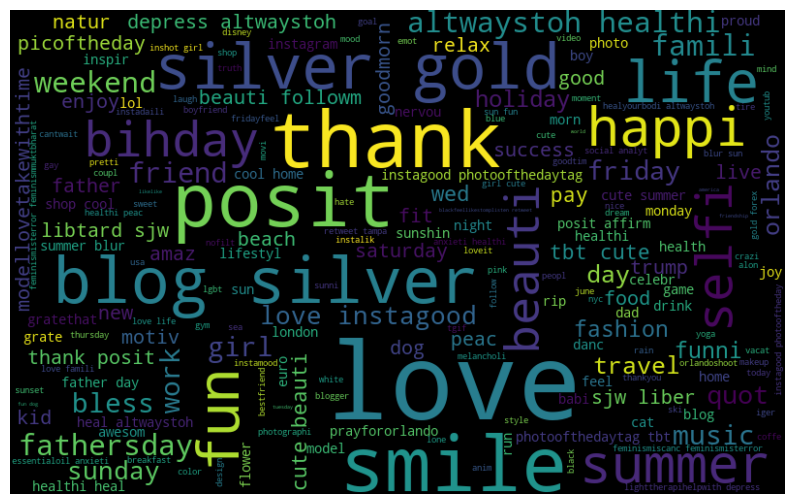

In [ ]:
from wordcloud import WordCloud 

all_words = ''.join(text for text in combined_data['tidy_tweet'])
wordcloud = WordCloud(width=800 , height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize = (10,7) )
plt.imshow(wordcloud , interpolation = 'bilinear')
plt.axis('off')
plt.show()

### 3.3 Words in non-racist/sexist tweets

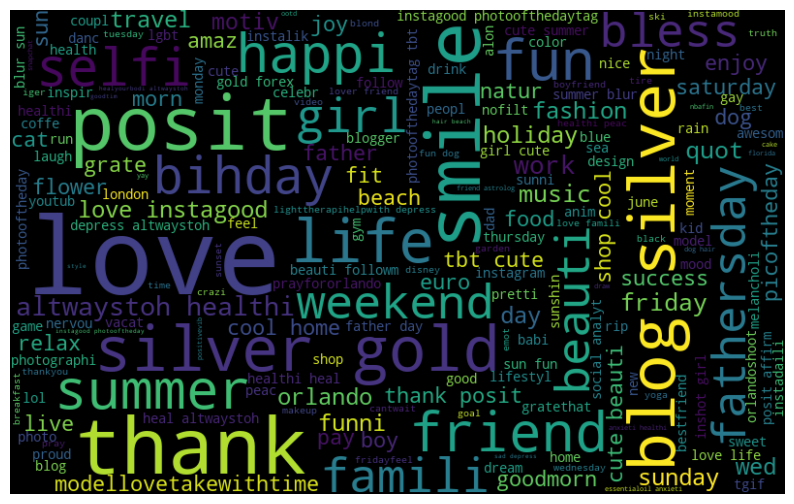

In [ ]:
non_racist_words = ''.join([text for text in combined_data['tidy_tweet'][combined_data['label']==0]])

wordcloud = WordCloud(width=800, height=500, max_font_size=110).generate(non_racist_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Most of the frequent words are compatible with the sentiment i.e non racist/sexist e.g thank,friend,summer,love,smile.

### 3.4 Words in racist/sexist tweets

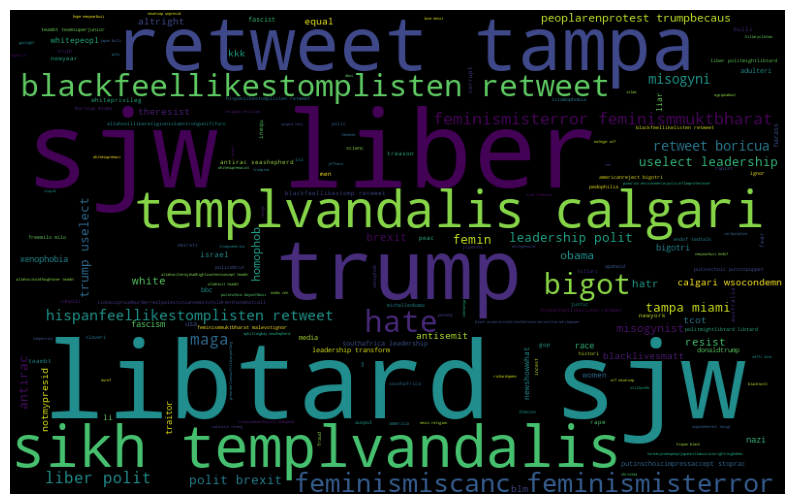

In [ ]:
racist_words = ''.join([text for text in combined_data['tidy_tweet'][combined_data['label']==1]])

wordcloud = WordCloud(width= 800, height=500, max_font_size=110).generate(racist_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Most of the frequent words are negative and have negative connotations.

### Understanding impact of hashtags on tweet sentiment
Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We will try to check whether these hashtags add any value to our sentiment analysis task, i.e. if they help in distinguishing tweets into the different sentiments.



We will store all the trend terms in two separate lists — one for non-racist/sexist tweets and the other for racist/sexist tweets.

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(/w+)",i)
        
    